# K Nearest Neighbors
The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems.
#### How does it work :
The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.
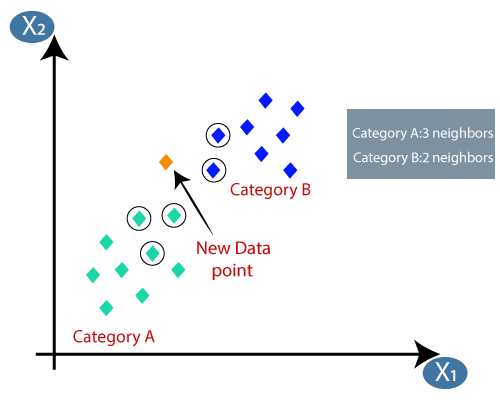
1. We need to choose the K value.
2. Next It classifies the points based on their distacne from negibors. 
3. Let we have a point, and we want to put that in a class.So KNNs well calculate its Euclidian distance from its neares "K" neighbors.
4. Next it chacks the majority and classifiy the point to that major catregory.
**e.g. If K=5 and 3 pts are from Banana and 2 pts are from apple ,then the new fruit for which we caculated the distance will be classified in Banana category**.
##### KNN is also known as Lazy algorithm because it does not learn anything in training. Actual calculation is done during teating time only.On Basis of that calssification is done.<br>
#### How To choose Optimum K value :
1. Plot a graph for k-value v/s Error with different k-values (consider changing k in ascending order)
2. For some time as K increases Error decreases but after certain threshold Error Start increasing. Thath threshold value is optimum k value.
3. Do not Choose too high K-value as it results in overfitting of model.
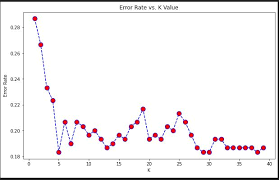

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [6]:
df=load_iris()


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [12]:
data=pd.DataFrame(df.data)
data.columns=df.feature_names
data['Target']=df.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
l=[]
for i in data['Target']:
    if i==0:
        l.append('setosa')
    elif i==1:
        l.append('versicolor')
    else:
        l.append('virginica')
data['Target_name']=l
data.tail(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,Target_name
130,7.4,2.8,6.1,1.9,2,virginica
131,7.9,3.8,6.4,2.0,2,virginica
132,6.4,2.8,5.6,2.2,2,virginica
133,6.3,2.8,5.1,1.5,2,virginica
134,6.1,2.6,5.6,1.4,2,virginica
135,7.7,3.0,6.1,2.3,2,virginica
136,6.3,3.4,5.6,2.4,2,virginica
137,6.4,3.1,5.5,1.8,2,virginica
138,6.0,3.0,4.8,1.8,2,virginica
139,6.9,3.1,5.4,2.1,2,virginica


In [14]:
data.isnull().mean()

sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
Target               0.0
dtype: float64

In [18]:
data.shape

(150, 6)

In [27]:
data1=data.sample(frac=1)
data1.head(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,Target_name
0,5.1,3.5,1.4,0.2,0,setosa
28,5.2,3.4,1.4,0.2,0,setosa
29,4.7,3.2,1.6,0.2,0,setosa
138,6.0,3.0,4.8,1.8,2,virginica
94,5.6,2.7,4.2,1.3,1,versicolor
81,5.5,2.4,3.7,1.0,1,versicolor
41,4.5,2.3,1.3,0.3,0,setosa
35,5.0,3.2,1.2,0.2,0,setosa
71,6.1,2.8,4.0,1.3,1,versicolor
105,7.6,3.0,6.6,2.1,2,virginica


In [28]:
data1=data1.reset_index()
data1=data1.drop('index',axis=1)
data1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,Target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,5.2,3.4,1.4,0.2,0,setosa
2,4.7,3.2,1.6,0.2,0,setosa
3,6.0,3.0,4.8,1.8,2,virginica
4,5.6,2.7,4.2,1.3,1,versicolor
...,...,...,...,...,...,...
145,5.1,3.8,1.6,0.2,0,setosa
146,6.2,2.9,4.3,1.3,1,versicolor
147,6.5,3.2,5.1,2.0,2,virginica
148,6.9,3.2,5.7,2.3,2,virginica


In [33]:
# Train Test Split
from sklearn.model_selection import train_test_split as tts
x=data.iloc[:,:-2]
y=data['Target']
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=42)

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
knn.predict(x_train)

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [38]:
print(confusion_matrix(y_test,y_pred))
print('\n','Accuracy : ',accuracy_score(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

 Accuracy :  1.0
